In [51]:
import correlation_steps as corrsteps
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import norm

directory = "/data/20170726/bead1_15um_QWP/steps/"
calibration_path = directory + "calibration_1positive_47_3Hz/"
measurement_path = directory + "47_3_new2/"

In [52]:
t, dc, corr = corrsteps.formData(measurement_path, calibration_path)

phase shift is  106
calibrating constant c =  5.59128597106e+15


In [66]:
50*len(corr)

41650

<IPython.core.display.Javascript object>


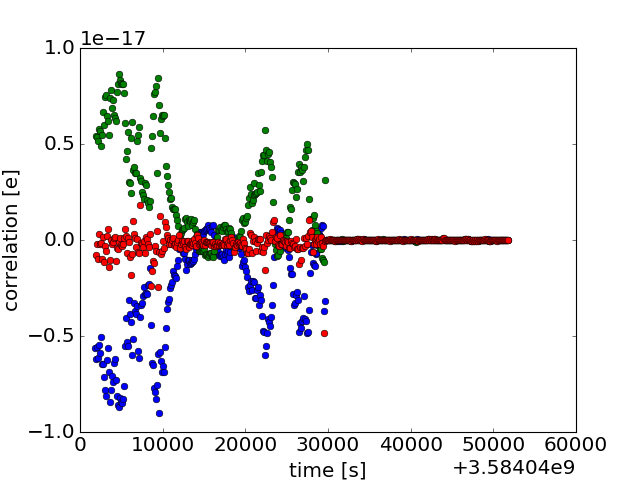

In [54]:
plt.plot(t[::2],corr[::2],'o')
plt.plot(t[1::2],corr[1::2],'o')
plt.plot(t[2::2],np.array(corr[1::2])+np.array(corr[2::2]),'o')
plt.xlabel('time [s]')
plt.ylabel('correlation [e]')
plt.show()

<IPython.core.display.Javascript object>


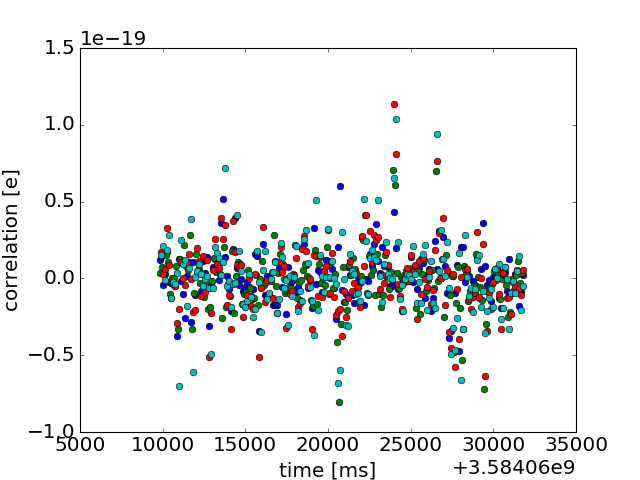

In [55]:
n = len(t)/2 + 50
plt.plot(t[n::2],corr[n::2],'o')
plt.plot(t[n+1::2],corr[n+1::2],'o')
plt.plot(t[n+2::2],np.array(corr[n+1::2])+np.array(corr[n+2::2]),'o')
plt.plot(t[n+2::2],np.array(corr[n:-2:2])+np.array(corr[n+1::2]),'o')
plt.xlabel('time [ms]')
plt.ylabel('correlation [e]')
plt.show()

In [56]:
dc_corr_list_pos = np.array(corr[n:-2:2])+np.array(corr[n+1::2])
dc_corr_list_neg = np.array(corr[n+1::2])+np.array(corr[n+2::2])
time_steps = np.array(t[n+1::2]) - t[n+1]

In [62]:
%matplotlib notebook

# plot the figure
pn, binp = np.histogram(dc_corr_list_pos, bins=50)
mup, stdp = norm.fit(dc_corr_list_pos)

mp = float(max(pn))

if mup > 0:
    lboundp = [0.1*mp, 0.1*mup, 0.1*stdp]
    uboundp = [1.2*mp, 1.2*mup, 1.2*stdp]
else:
    lboundp = [0.1*mp, 1.2*mup, 0.1*stdp]
    uboundp = [1.2*mp, 0.1*mup, 1.2*stdp]

x = sorted(list(set(np.concatenate((binp, binn)))))
p = norm.pdf(x, mup, stdp)

xp = (binp[1:] + binp[:-1]) / 2.

poptp, pcovp = curve_fit(corrsteps.gaussian_distribution, xp, pn, bounds=(lboundp, uboundp))
perrp = np.sqrt(np.diag(pcovp))
fitted_data_p = corrsteps.gaussian_distribution(xp, *poptp)

In [63]:
def latex_float(f):
    float_str = "{0:.2g}".format(f)
    if "e" in float_str:
        base, exponent = float_str.split("e")
        return r"{0} \times 10^{{{1}}}".format(base, int(exponent))
    else:
        return float_str

<IPython.core.display.Javascript object>


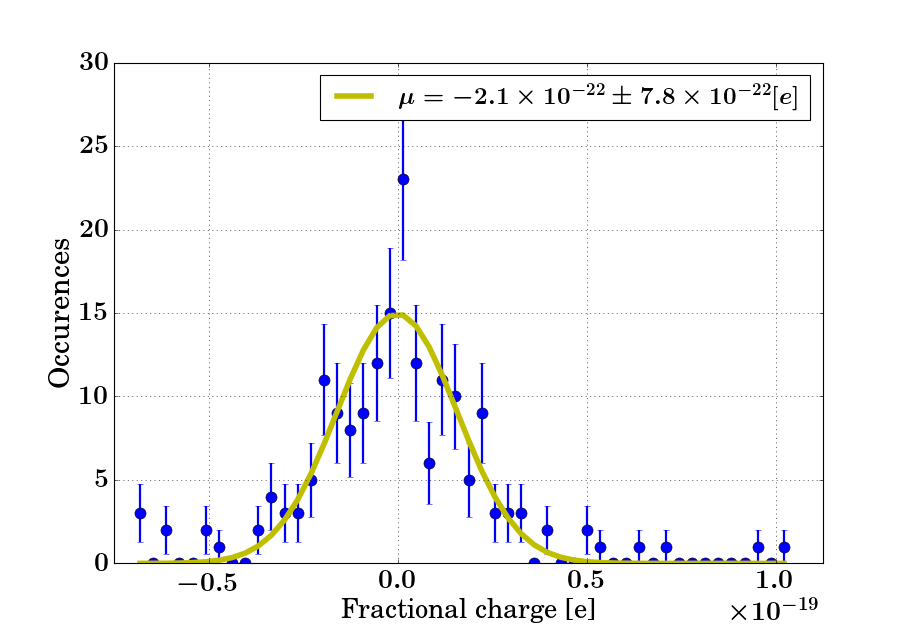

In [69]:
import matplotlib
%matplotlib notebook

plt.rc('text', usetex=True)
#plt.rc('font', family='serif')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
matplotlib.rc('font', **font)
matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']

fit_mean = latex_float(poptp[1])
fit_std_float = float(poptp[2])/np.sqrt(len(t)/2)
fit_std = latex_float(fit_std_float)
fit_label = '\mu = '+fit_mean+'\pm'+fit_std+' [e]'

plt.errorbar(xp, pn, yerr=np.sqrt(pn), fmt='o', markersize=10, linewidth=2)
plt.plot(xp, fitted_data_p, 'y', linewidth=5, label=fit_label)

# 41650 seconds integration time

plt.xlim([1.1*xp[0],1.1*xp[-1]])
plt.xlabel('Fractional charge [e]')
plt.ylabel('Occurences', size=26)
plt.legend(prop={'size': 22})

plt.grid()
plt.show()

In [59]:
# print parameters
print 'fitting pos to gaussian gives:'
print '           mean = ', poptp[1], ' with error ', perrp[1]
print '    actual mean = ', mup
print ''
print '           standard deviation = ', poptp[2], ' with error ', perrp[2]
print '    actual standard deviation = ', stdp
print ''
print ''
print 'fitting neg to gaussian gives:'
print '           mean = ', poptn[1], ' with error ', perrn[1]
print '    actual mean = ', mun
print ''
print '           standard deviation = ', poptn[2], ' with error ', perrn[2]
print '    actual standard deviation = ', stdn

fitting pos to gaussian gives:
           mean =  -2.14270565807e-22  with error  1.14214091636e-21
    actual mean =  -3.29647024318e-22

           standard deviation =  1.59094119926e-20  with error  8.04420257713e-22
    actual standard deviation =  2.44760184501e-20


fitting neg to gaussian gives:
           mean =  -2.5623031223e-22  with error  1.57254228052e-21
    actual mean =  -3.82727345356e-22

           standard deviation =  1.80424486084e-20  with error  1.10837654812e-21
    actual standard deviation =  2.24241039695e-20
